# LBM Code

In [3]:
import numpy as np
import matplotlib.pyplot as plt
#***************************************InputParameters************************************************
Nx=51 #Domain Length
#***************************************Lattice-Properties-D2Q5*************************************************
w = np.array([1.0/2.0, 1.0/2.0],dtype="float64")
cx = np.array([1, -1],dtype="int16")  
#********************************************Set-Parameters*********************************************
#------------Dimensionless-Data----------------
nuo = 1.0;Lo = 1.0;
#------------LBM-Data----------------
dx = Lo/(Nx-1);
rel = 2.0**2 *2**(1);
dt = dx / rel;
nu = dt * nuo / (dx * dx); 
cs = 1.0 ;
tau = (nu / (cs * cs)) + (1. / 2.); 
#--------------Print-Dados---------------------
print('tau=',tau,'\t nu=',nu)
print('rel=',rel)
print('dx=',dx,'\t dt=',dt)

tau= 6.75 	 nu= 6.25
rel= 8.0
dx= 0.02 	 dt= 0.0025


In [5]:
#********************************Initializing-Pressure-Boundaries***********************************************************
x=np.linspace(0.0,Lo,Nx) #x-array Length
T=np.zeros((Nx),dtype="float64") #Allocating Temperatire Field
#********************************Initialize-Distribution-Function***********************************************************
f=np.zeros((2,Nx),dtype="float64") #Allocating Distribution Function
fp=np.zeros((2,Nx),dtype="float64") #Allocating Post-Colisional Distribution Function
for k in range(0,2):
    f[k,:]=w[k]*T[:]

In [10]:
mstep=100
for kk in range(0,mstep):
    #*******Collision********
    for k in range(0,2):
        fp[k,:]=f[k,:]-(f[k,:]-w[k]*T[:])/tau # Collision Lattice Index 1-2
    #*******Streaming********
    for k in range(0,2):
        f[k,:]=np.roll(fp[k,:], cx[k], axis=0)
    #***********BC********
    f[0,0]=1.0 - f[1,0]
    f[1,Nx-1]=0.0 - f[0,Nx-1]
    #***********Macro********
    T=f[0,:]+f[1,:]

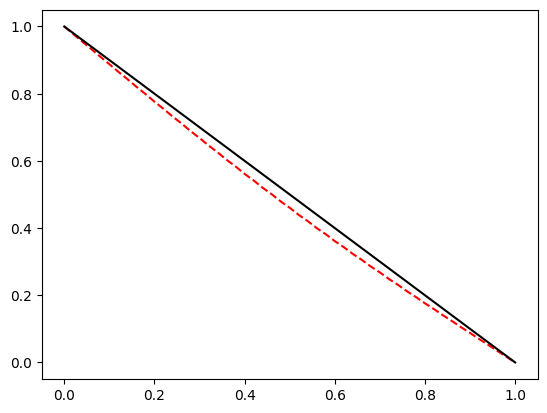

In [16]:
Tana=-x+1
plt.plot(x,T,'r--')
plt.plot(x,Tana,'k-')

# FVM Code

In [19]:
import numpy as np
import matplotlib.pyplot as plt

#***************************************InputParameters************************************************
Nx=51 #Domain Length
#********************************************Set-Parameters*********************************************
#------------Dimensionless-Data----------------
nuo = 1.0;Lo = 1.0;
#------------LBM-Data----------------
dx = Lo/(Nx-1);
rel = 2.0**2 *2**(1);
dt = dx / rel; 
#--------------Print-Dados---------------------
print('nu=',nuo)
print('rel=',rel)
print('dx=',dx,'\t dt=',dt)

nu= 1.0
rel= 8.0
dx= 0.02 	 dt= 0.0025


In [20]:
#********************************Initializing-Pressure-Boundaries***********************************************************
x=np.linspace(0.0,Lo,Nx) #x-array Length
Tp=np.zeros((Nx),dtype="float64") #Allocating Temperatire Field
To=np.zeros((Nx),dtype="float64") #Allocating Temperatire Field
Tw=1.0
Te=1.0

In [27]:
mstep=100000
for kk in range(0,mstep):
    Tp= To + dt*nuo*(np.roll(To, 1, axis=0) - 2.0*To + np.roll(To, -1, axis=0))
    To[0]=1.0
    To[Nx-1]=0.0
    To[1:-1]=Tp[1:-1]

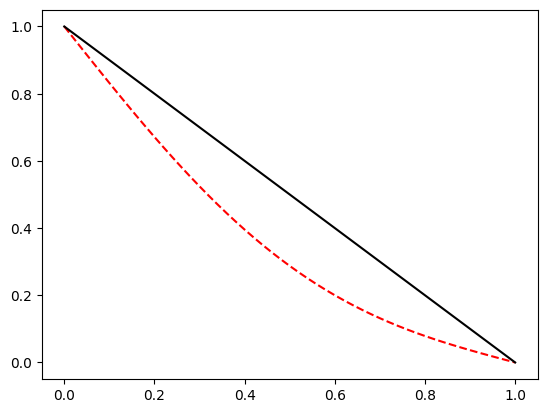

In [28]:
Tana=-x+1
plt.plot(x,To,'r--')
plt.plot(x,Tana,'k-')